In [39]:
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt
%matplotlib inline

สำหรับหาจุดใน image coordinate และ จุดใน world coordiante (BEV)

input:
- src - รูปจาก footage
- dst - รูปจาก google map หรือรูป BEV อื่นๆ
- no_point - จำนวนจุด(นับจากจุดแรก)ที่อยู่ในแนวเดียวกัน ที่จะให้เป็นจุดบนแกน x
- ref_len - ความยาวอ้างอิงสำหรับ scale เพื่อหาตำแหน่งจุดจาก google map
- ref_len_idx - ลำดับของจุดต้น-ปลายของความยาวอ้างอิง
- measured_data - ถ้าต้องการ replace จุดจาก google map เป็นจุดที่วัดมา

output:
- src.out - จุดใน image coordinate
- dst.out - จุดใน world coordiante

How to use:
- เมื่อกด run จะมีหน้าต่างรูป dst เด้งขึ้นมา คลิกขวาเพื่อกดเลือกจุด กด "s" เพื่อ save ตำแหน่งแต่ละจุด กด "esc" เพื่อปิดหน้าต่างเมื่อคลิกจุดครบแล้ว 
- ต่อมาจะมาหน้าต่างรูป src เด้งขึ้นมา คลิกเพื่อเลือกจุดด้วยวิธีเดิม **คลิกจุกตามลำดับเดียวกันกับในรูป dst
**ถ้ากดผิด กด "esc" เพื่อปิดหน้าต่างแล้ว run cell ใหม่

หมายเหตุ:
- assume no_point จุดแรกใน dst อยู่ในแนวเดียวกัน และจะให้แกนนั้นเป็นแกน x


In [40]:
drawing = False # true if mouse is pressed
src_x, src_y = -1,-1
dst_x, dst_y = -1,-1

trans_list = []


#input-----------------------------------
src = cv.imread('imgs/asoke_s.jpg', -1)
dst = cv.imread('imgs/asoke_ref_s.jpg', -1)

no_point = 4 #for north--5 for south--4

ref_len = 21.95 #for north--18.95 for south--21.95
ref_len_idx = (0,3) #for north--(0,4) for south--(0,3)

#measured_data = [[0,0], [2.81,0], [5.92,0], [8.33,0], [18.95,0]] #north
measured_data = [[0,0], [5.31,0], [8.09,0], [21.15,0]] #south
#-----------------------------------

## Find dst in world coordinate

In [41]:
# mouse callback function
def select_points_dst(event,x,y,flags,param):
    global dst_x, dst_y, drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        dst_x, dst_y = x,y
        cv.circle(dst_copy,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False

def find_rotation_angel(a,no_point):
    sum_atan = 0
    for i in range(no_point-1):
        i += 1
        sum_atan += math.atan(a[i][1]/a[i][0])
    rad = sum_atan/(no_point-1)
    return rad

def transformDst(a):
    #scale
    a = np.array(a)
    a = a * norma
    #set origin
    x0 = a[0][0]
    y0 = a[0][1]
    for i in range(len(a)):
        a[i][0] += -x0
        a[i][1] += -y0
    # print("set origin at (0,0):")
    # print(a)
    print(str(-x0))
    print(str(-y0))
    #rotate
    rad = find_rotation_angel(a,no_point)
    #rad = (math.atan(a[1][1]/a[1][0]) + math.atan(a[2][1]/a[2][0]) + math.atan(a[3][1]/a[3][0]) + math.atan(a[4][1]/a[4][0]) )/4 #north
    #rad = (math.atan(a[1][1]/a[1][0]) + math.atan(a[2][1]/a[2][0]) + math.atan(a[3][1]/a[3][0]) )/3 #south
    for i in range(len(a)):
        x,y = a[i][0],a[i][1]
        a[i][0] = x*math.cos(rad) + y*math.sin(rad)
        a[i][1] = -x*math.sin(rad) + y*math.cos(rad)
    print("rotate for "+str(rad)+" rad:")
    # print(a)
    return(a)

dst_list = []
dst_copy = dst.copy()
cv.namedWindow('dst',cv.WINDOW_KEEPRATIO)
cv.setMouseCallback('dst', select_points_dst)


while(1):
    cv.imshow('dst',dst_copy)
    k = cv.waitKey(1) & 0xFF
    if k == ord('s'):
        print('save points')
        cv.circle(dst_copy,(dst_x,dst_y),5,(0,255,0),-1)
        dst_list.append([dst_x,dst_y])
        print("dst points:")
        print(dst_list);
    elif k == 27: #esc key
        break
cv.destroyAllWindows()

norma = ref_len/math.dist(dst_list[ref_len_idx[0]], dst_list[ref_len_idx[1]]) 
print("normalize facter: " + str(norma))

new_dst_list = transformDst(dst_list)
print(new_dst_list)

save points
dst points:
[[574, 414]]
save points
dst points:
[[574, 414], [593, 321]]
save points
dst points:
[[574, 414], [593, 321], [603, 267]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40], [755, 379]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40], [755, 379], [789, 405]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40], [755, 379], [789, 405], [839, 444]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40], [755, 379], [789, 405], [839, 444], [895, 485]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40], [755, 379], [789, 405], [839, 444], [895, 485], [946, 523]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40], [755, 379], [789, 405], [839, 444], [895, 485], [946, 523], [1002, 564]]
save points
dst points:
[[574, 414], [593, 321], [603, 267], [647, 40], [755, 379], [789, 405], 

ถ้าต้องการ replace จุดที่หามาจาก gg map กับจุดที่วัดมา
** make sure the order is right **

In [42]:
if len(measured_data)>0: 
    for i in range(len(measured_data )):
        new_dst_list[i] = measured_data [i]

for save the new dst as a .out file

In [43]:
np.savetxt('dst.out', new_dst_list, delimiter=',')

## Visualization

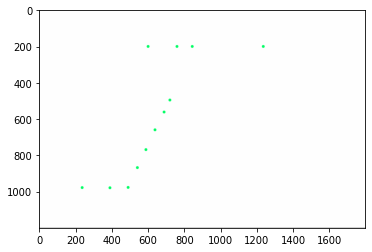

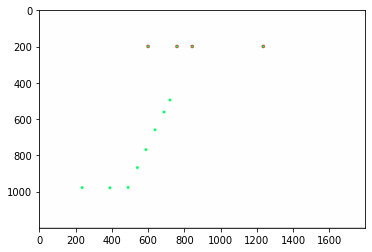

In [44]:
img = cv.imread('imgs/White_full.png', -1)

# Window name in which image is displayed
window_name = 'Image'
   
for i in new_dst_list:
    # Center coordinates
    center_coordinates = (round(i[0]*30+600),round(i[1]*30+200))
    img = cv.circle(img, center_coordinates, 8, (0, 255, 100), -1) #green
   
# Displaying the image 
plt.imshow(img) 
plt.show()


for i in measured_data:
    # Center coordinates
    center_coordinates = (round(i[0]*30+600),round(i[1]*30+200))
    img = cv.circle(img, center_coordinates, 8, (255, 0, 0), 2) #red
   
# Displaying the image 
plt.imshow(img) 
plt.show()

## Find src in image coordinate

In [45]:
# mouse callback function
def select_points_src(event,x,y,flags,param):
    global src_x, src_y, trans_x, trans_y, drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        src_x, src_y = x,y
        cv.circle(src_copy,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False

src_list = []
src_copy = src.copy()
cv.namedWindow('src',cv.WINDOW_KEEPRATIO)
cv.setMouseCallback('src', select_points_src)

while(1):
    cv.imshow('src',src_copy)
    k = cv.waitKey(1) & 0xFF
    if k == ord('s'):
        print('save points')
        cv.circle(src_copy,(src_x,src_y),5,(0,255,0),-1)
        src_list.append([src_x,src_y])
        print("src points:")
        print(src_list)
    elif k == 27: #esc key
        break
cv.destroyAllWindows()

print(src_list)

save points
src points:
[[508, 378]]
save points
src points:
[[508, 378], [664, 340]]
save points
src points:
[[508, 378], [664, 340], [736, 325]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261], [918, 408]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261], [918, 408], [994, 427]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261], [918, 408], [994, 427], [1095, 466]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261], [918, 408], [994, 427], [1095, 466], [1222, 526]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261], [918, 408], [994, 427], [1095, 466], [1222, 526], [1357, 588]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261], [918, 408], [994, 427], [1095, 466], [1222, 526], [1357, 588], [1572, 680]]
save points
src points:
[[508, 378], [664, 340], [736, 325], [991, 261], [918, 4

for save the new src as a .out file

In [46]:
src_list = np.array(src_list)
np.savetxt('src.out', src_list, delimiter=',')